<a id="segundo"></a>
## 2. Un problema* Multi-label*

<img src="https://files.virgool.io/upload/users/12226/posts/oxo6jvmweqmr/1ios2rcvohwc.png" width="35%" style="float: right;" />

Un tipo de problema un poco diferente a la clásica clasificación que hemos visto es el de etiquetación múltiple o *multi-label* [[5]](#refs), en donde se debe asignar una *o un grupo* de etiquetas a un dato, es decir, puede ser tratado como un problema de clasificación donde las clases pasan a ser **NO** mutuamente excluyente, es decir puede ser asignada más de una a un dato. Este problema se ve muchas veces en imágenes que contienen más de algun objeto, por lo que las clases pasan a ser no excluyente, o en sí se transforma en un problema de *multi-label*. También aparece en texto cuando se debe asignar un tópico a un documento, ya que podría hablar de diferentes cosas, como religión, política, finanzas o educación, por lo que podría contener varios.


En esta actividad se trabajará con una versión liviana del dataset __[**NUS-WIDE**](https://lms.comp.nus.edu.sg/research/NUS-WIDE.htm)__ , el cual consta de imágenes extraídas de la web (Flickr.com) en donde los diferentes *tags* o conceptos asociados a la imagen pasan a ser las etiquetas/*labels*. De la página donde se alberga NUS-WIDE será necesario descargar:
* Concept List: http://dl.nextcenter.org/public/nuswide/ConceptsList.zip
* NUS-WIDE-Lite: http://dl.nextcenter.org/public/nuswide/NUS-WIDE-Lite.rar
* NUS-WIDE-Urls: http://dl.nextcenter.org/public/nuswide/NUS-WIDE-urls.rar

> a) Cargue los datos del *output* del modelo (*labels*), descríbalos ¿Cuántos ejemplos hay por cada clase?

In [1]:
import pandas as pd
import numpy as np
y = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_groundtruth/Lite_GT_Train.txt",delimiter="\s",header=None).values
y.shape

/home/maldos/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


(27807, 81)

Hay 27807 ejemplos, cada una representada uno con 81 bits, que corresponden a las distintas labels. A continuación descubriremos la cantidad de combinaciones de etiquetas distintas.

In [2]:
lista = []
for i in range(27807):
    sum=0
    for j in range(81):
        sum+=(y[i][j])*(2**(81-j))
    lista.append(sum)
len(set(lista)) 

5907

Hay 5907 diferentes grupos de etiquetas repetidas a continuación graficamos las frecuencias de ocurrencias de estas etiquetas.

In [3]:
from collections import Counter
import matplotlib.pyplot as plt
plt.plot(Counter(lista).values())
plt.ylabel('some numbers')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
label_names = np.loadtxt("Concepts81.txt",dtype='object')
i=0
for line in label_names:
    print str(i) +" "+line
    i+=1

0 airport
1 animal
2 beach
3 bear
4 birds
5 boats
6 book
7 bridge
8 buildings
9 cars
10 castle
11 cat
12 cityscape
13 clouds
14 computer
15 coral
16 cow
17 dancing
18 dog
19 earthquake
20 elk
21 fire
22 fish
23 flags
24 flowers
25 food
26 fox
27 frost
28 garden
29 glacier
30 grass
31 harbor
32 horses
33 house
34 lake
35 leaf
36 map
37 military
38 moon
39 mountain
40 nighttime
41 ocean
42 person
43 plane
44 plants
45 police
46 protest
47 railroad
48 rainbow
49 reflection
50 road
51 rocks
52 running
53 sand
54 sign
55 sky
56 snow
57 soccer
58 sports
59 statue
60 street
61 sun
62 sunset
63 surf
64 swimmers
65 tattoo
66 temple
67 tiger
68 tower
69 town
70 toy
71 train
72 tree
73 valley
74 vehicle
75 water
76 waterfall
77 wedding
78 whales
79 window
80 zebra


Se aprecia que el output de labels predichas corresponden precisamente a 81 bits de lo anterior se concluye que cada label aparecerá "activado" o "desactivado" en función de su presencia/ausencia en la imagen.

> b) Visualice el tema de que un dato  (imagen en este caso) puede tener múltiples etiquetas. Comente sobre la definición del problema *multi-label* y cómo aplica en este caso.

27807
5331
[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0]
[ 8 12 13 40 55 68]
('Etiquetas de la imagen :', array(['buildings', 'cityscape', 'clouds', 'nighttime', 'sky', 'tower'],
      dtype=object))


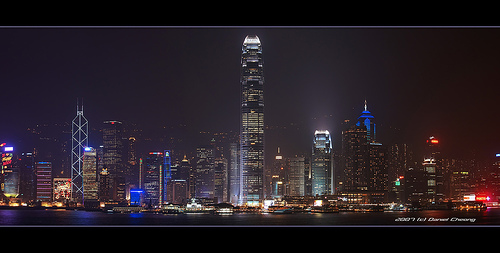

In [5]:
import urllib2,re
arch = open("NUS-WIDE-urls.txt",'r') #lectura para mapeo de link a url
regex = re.compile("\s+")
image2url = {}
lene=0
sum=0
for line in arch.readlines():
    if lene==0:
        lene+=1
        continue
    aux = regex.split(line.strip())
    image = aux[0].split("Flickr\\")[-1]
    url_m = aux[3]
    image2url[image] = url_m
    if (sum<40):
        sum+=2 
arch.close()
arch = open("NUS-WIDE-Lite/image list/Train_imageOutPutFileList.txt",'r')
data_urls = [image2url[line.strip()] for line in arch.readlines()]
arch.close()
#VISUALIZACIÓN DE LO QUE TENEMOS HASTA AHORA:
print str(len(data_urls))
from PIL import Image
s = np.random.randint(0,len(data_urls))
category_sample = np.where(y[s]==1)[0]
print s
print y[s]
print category_sample
print("Etiquetas de la imagen :",label_names[category_sample])
im = Image.open(urllib2.urlopen(data_urls[s]))
im


En este caso el multilabel es necesario, ya que la imagen tiene una serie de objetos o seres vivos que no son excluyentes, por lo cual con muchas etiquetas podemos definir bien la imagen.

> c) Comente sobre la **representación** que posee la salida de los modelos (*labels*) ¿En qué dominio habita? ¿Tiene restricciones?

El output corresponde a un arreglo binario de 81 bits para representar 81 posibles categorías. Una imagen tendrá activados(1) o desactivados(0) los bits, para indicar su correspondencia con 1, 2, 3, ..., u 81 tags. Lo que se intentará a continuación es llegar a partir de una imagen bruta, al vector de clasificación adecuado de entre 2^81 posibles combinaciónes. Difícil no?

> d) Decida sobre una **representación**, en este caso descriptores, para la entrada a los modelos (*input*), puede utilizar la mezcla entre distintos descriptores, comente sobre la elección y qué representa.

In [6]:
file = "Normalized_CH_Lite_Train.dat"
descriptorsCH = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/Normalized_CH_Lite_Train.dat",delimiter="\s",header=None).values
descriptorsCM55 = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/Normalized_CM55_Lite_Train.dat",delimiter="\s",header=None).values
descriptorsCORR = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/Normalized_CORR_Lite_Train.dat",delimiter="\s",header=None).values
descriptorsEDH = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/Normalized_EDH_Lite_Train.dat",delimiter="\s",header=None).values
descriptorsWT = pd.read_csv("NUS-WIDE-Lite/NUS-WIDE-Lite_features/Normalized_WT_Lite_Train.dat",delimiter="\s",header=None).values
print descriptorsCH.shape
print descriptorsCM55.shape
print descriptorsCORR.shape
print descriptorsEDH.shape
print descriptorsWT.shape

/home/maldos/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/maldos/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/maldos/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specify

(27807, 64)
(27807, 225)
(27807, 144)
(27807, 73)
(27807, 128)


Para poder ver cual responde mejor a nuestras necesidades vamos a probar todos los descriptores, que tienen diferente dimensionalidad. A partir de estos valores hay que llegar al vector binario de d=81, por medio de la creación de un modelo a través del entrenamiento supervisado.

> e) Deje un conjunto separado para evaluar los modelos y comportar como conjunto de pruebas, además de realizar la clásica estandarización de las entradas de los modelos.

Primero reduciremos el tamaño de la entrada para poder analizarlo sin problema con nuestros computadores.

In [11]:
y=y[0:10000]
print y.shape
descriptorsCH=descriptorsCH[0:10000]
descriptorsCM55=descriptorsCM55[0:10000]
descriptorsCORR=descriptorsCORR[0:10000]
descriptorsEDH=descriptorsEDH[0:10000]
descriptorsWT=descriptorsWT[0:10000]
print descriptorsCH.shape
print descriptorsCM55.shape
print descriptorsCORR.shape
print descriptorsEDH.shape
print descriptorsWT.shape

(10000, 81)
(10000, 64)
(10000, 225)
(10000, 144)
(10000, 73)
(10000, 128)


In [12]:
from sklearn.model_selection import train_test_split
X_trainCH,X_testCH,y_trainCH,y_testCH = train_test_split(descriptorsCH,y,test_size=0.33,shuffle = False, stratify = None)
X_trainCM55,X_testCM55,y_trainCM55,y_testCM55 = train_test_split(descriptorsCM55,y,test_size=0.33,shuffle = False, stratify = None)
X_trainCORR,X_testCORR,y_trainCORR,y_testCORR = train_test_split(descriptorsCORR,y,test_size=0.33,shuffle = False, stratify = None)
X_trainEDH,X_testEDH,y_trainEDH,y_testEDH = train_test_split(descriptorsEDH,y,test_size=0.33,shuffle = False, stratify = None)
X_trainWT,X_testWT,y_trainWT,y_testWT = train_test_split(descriptorsWT,y,test_size=0.33,shuffle = False, stratify = None)

Al momento de elegir un set de entrenamiento y uno de prueba se desactivo la aleatoridad para que todos los descriptores trabajaran con los mismos datos.

In [13]:
print str(X_trainCH.shape)+" "+str(X_testCH.shape)
print str(X_trainCM55.shape)+" "+str(X_testCM55.shape)
print str(X_trainCORR.shape)+" "+str(X_testCORR.shape)
print str(X_trainEDH.shape)+" "+str(X_testEDH.shape)
print str(X_trainWT.shape)+" "+str(X_testWT.shape)

(6700, 64) (3300, 64)
(6700, 225) (3300, 225)
(6700, 144) (3300, 144)
(6700, 73) (3300, 73)
(6700, 128) (3300, 128)


En este caso se usa el StandarScaler que como sabemos transformará sus datos de modo que su distribución tenga un valor medio 0 y una desviación estándar de 1. Dada la distribución de los datos, cada valor en el conjunto de datos tendrá el valor medio de muestra restado y luego se dividirá por la desviación estándar de todo el conjunto de datos.

In [14]:
from sklearn.preprocessing import StandardScaler
def transformarInput(XTRAIN,XTEST):
    std=StandardScaler()
    std.fit(XTRAIN)
    return [std.transform(XTRAIN),std.transform(XTEST)]

transform = transformarInput(X_trainCH,X_testCH)
X_trainCH = transform[0]
X_testCH= transform[1]

transform = transformarInput(X_trainCM55,X_testCM55)
X_trainCM55 = transform[0]
X_testCM55= transform[1]

transform = transformarInput(X_trainCORR,X_testCORR)
X_trainCORR = transform[0]
X_testCORR= transform[1]

transform = transformarInput(X_trainEDH,X_testEDH)
X_trainEDH = transform[0]
X_testEDH= transform[1]

transform = transformarInput(X_trainWT,X_testWT)
X_trainWT = transform[0]
X_testWT= transform[1]


> f) Se presenta una métrica para validar en el código a continuación, la cual mide la cantidad de aciertos a las *labels* que tenga un dato de manera normalizada. Defina **otra** métrica a utilizar con el propósito de validar lo mismo (el desempeño de un modelo).

La métrica de evaluación que se nos ocuree que puede ser efectiva es el promedio de errores de clasificación de etiquetas, ya que es visualmente muy significativa para nosotros.


In [15]:
def evaluation_metric(y_true,y_pred):
    suma = 0.0
    for y,yp in zip(y_true,y_pred):
        suma += np.dot(y,yp) / np.sum(y)  #cantidad de valores iguales
    return suma/float(len(y_true))

def evaluacion_MinError(y_true,y_pred): #siendo y un vector binario de dimensionalidad 81
    errores = 0.0
    columnas=y_true.shape[0]
    filas=y_true.shape[1]
    for columna in range(columnas):
        for fila in range(filas):
            if (y_pred[columna][fila]!=y_true[columna][fila]):
                errores+=1
    return errores/columnas

def evaluacion_tagExtra(y_true,y_pred): 
    errores = 0.0
    columnas=y_true.shape[0]
    filas=y_true.shape[1]
    for columna in range(columnas):
        for fila in range(filas):
            if (y_true[columna][fila]==0 and y_pred[columna][fila]==1):
                errores+=1
    return errores/columnas

> g) Experimente en resolver el problema con un Árbol de Decisión (varíando los hiper-parámetros estructurales), el cual a través de *sklearn* se puede extender de manera sencilla a *multi-label* [[4]](#refs). Mida las métricas de desempeño definidas anteriormente sobre ambos conjuntos (entrenamiento y pruebas), comente.

Es un método de clasificación supervisado y discriminativo donde el entrenamiento consiste en la construcción de un árbol de múltiples caminos en el que para cada nodo se busca el atributo que provee mayor ganancia de información para la clase. El árbol crece hasta su tamaño máximo y luego es acotado para mejorar su capacidad de generalización para los datos que no ocurren en el conjunto de datos de entrenamiento. A partir de este modelo se infieren reglas de decisión sobre las cuales se basa la clasificación.

In [16]:
from sklearn.tree import DecisionTreeClassifier as Tree
def modelTree(XTRAIN,YTRAIN):
    model = Tree() 
    model.set_params(max_depth=5,criterion='gini',splitter='best')
    model.fit(XTRAIN,YTRAIN)
    return model
    
modelCH=modelTree(X_trainCH,y_trainCH)
y_predictCH=modelCH.predict(X_trainCH)
print "\nCH\nmétrica con datos de entrenamiento: " + str(evaluacion_MinError(y_trainCH,y_predictCH))
print "métrica en test: " + str(evaluacion_MinError(y_testCH,modelCH.predict(X_testCH)))

modelCM55=modelTree(X_trainCM55,y_trainCM55)
y_predictCM55=modelCM55.predict(X_trainCM55)
print "\nCM55\nmétrica con datos de entrenamiento: " + str(evaluacion_MinError(y_trainCM55,y_predictCM55))
print "métrica en test: " + str(evaluacion_MinError(y_testCM55,modelCM55.predict(X_testCM55)))

modelCORR=modelTree(X_trainCORR,y_trainCORR)
y_predictCORR=modelCORR.predict(X_trainCORR)
print "\nCORR\nmétrica con datos de entrenamiento: " + str(evaluacion_MinError(y_trainCORR,y_predictCORR))
print "métrica en test: " + str(evaluacion_MinError(y_testCORR,modelCORR.predict(X_testCORR)))

modelEDH=modelTree(X_trainEDH,y_trainEDH)
y_predictEDH=modelEDH.predict(X_trainEDH)
print "\nEDH\nmétrica con datos de entrenamiento: " + str(evaluacion_MinError(y_trainEDH,y_predictEDH))
print "métrica en test: " + str(evaluacion_MinError(y_testEDH,modelEDH.predict(X_testEDH)))

modelWT=modelTree(X_trainWT,y_trainWT)
y_predictWT=modelWT.predict(X_trainWT)
print "\nWT\nmétrica con datos de entrenamiento: " + str(evaluacion_MinError(y_trainWT,y_predictWT))
print "métrica en test: " + str(evaluacion_MinError(y_testWT,modelWT.predict(X_testWT)))

##PREDICCIÓN CONJUNTA:
def prediccion_conjunta(y_predictCH,y_predictCM55,y_predictCORR,y_predictEDH,y_predictWT):
    suma=0.0
    columnas=y_predictCH.shape[0]
    filas=y_predictCH.shape[1]
    sol=np.zeros(shape=(columnas,filas))
    for fila in range(filas):
        for columna in range(columnas):
            suma += y_predictCH[columna][fila]
            suma += y_predictCM55[columna][fila]
            suma += y_predictCORR[columna][fila]
            suma += y_predictEDH[columna][fila]
            suma += y_predictWT[columna][fila]
            if (suma>=3):
                sol[columna][fila]=1
            else:
                sol[columna][fila]=0
            suma=0
    return sol
                
prediccion = prediccion_conjunta(y_predictCH,y_predictCM55,y_predictCORR,y_predictEDH,y_predictWT)
print "\nPREDICCION: " + str(evaluacion_MinError(y_trainWT,prediccion))




CH
métrica con datos de entrenamiento: 3.42746268657
métrica en test: 3.22212121212

CM55
métrica con datos de entrenamiento: 3.34611940299
métrica en test: 3.18606060606

CORR
métrica con datos de entrenamiento: 3.38417910448
métrica en test: 3.25878787879

EDH
métrica con datos de entrenamiento: 3.45492537313
métrica en test: 3.31303030303

WT
métrica con datos de entrenamiento: 3.40044776119
métrica en test: 3.28060606061

PREDICCION: 3.26552238806


Este error nos dice cuantas etiquetas tiene malas de las 81 existentes. Siendo 3 no muy bueno.

> h) Experimente en resolver el problema con una Máquina de Soporte Vectorial no lineal (varíando los hiper-parámetros estructurales), el cual a través de *sklearn* se puede extender a *multi-label* a través de la técnica **OneVsRest**. Mida las métricas de desempeño al igual que para el Árbol de Decisión, comente y compare sobre las métricas y los tiempos de ejecución.

In [17]:
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.multiclass import OneVsRestClassifier
model= SVM()
model.set_params(C=1.0,kernel='rbf')
meta_model = OneVsRestClassifier(model)
meta_model.fit(X_trainCH,y_trainCH)

print "métrica con datos de entrenamiento: " + str(evaluacion_MinError(y_trainCH,meta_model.predict(X_trainCH)))
print "métrica en test: " + str(evaluacion_MinError(y_testCH,meta_model.predict(X_testCH)))

/home/maldos/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 36 is present in all training examples.
  str(classes[c]))


métrica con datos de entrenamiento: 3.1423880597
métrica en test: 3.08696969697


La métrica SVM se tardó muchísimo en ejecutar comparada con la de árbol sin embargo mejoran bastante los resultados.

> i) Experimente en resolver el problema con una Red Neuronal *Feed Forward* (decida el número de capas y el número de neuronas, si desea puede utilizar las por defecto). Éste modelo se extiende a *multi-label* a través de la interfaz de *keras* seleccionando una *loss* adecuada, en este caso **binary cross entropy** ¿Por qué?

Binary cross entropy es un caso particular de categorical cross entropy, ya que en binary solo puede tomar valores de 1 y 0, lo cual se ajusta perfecto a nuestro modelo. Con este esta función de loss estamos minimizando el promedio del all-entropy en todas las clases.

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
modelNeuronal = Sequential()
modelNeuronal.add(Dense(256, input_dim=X_trainCH.shape[1], activation="relu"))
modelNeuronal.add(Dense(128, activation="relu"))
modelNeuronal.add(Dense(y_trainCH.shape[1], activation="sigmoid"))
modelNeuronal.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy")
modelNeuronal.fit(X_trainCH, y_trainCH, epochs=40, batch_size=128, verbose=1)

/home/maldos/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/40
6700/6700 [==============================] - 1s 128us/step - loss: 0.6032
Epoch 2/40
6700/6700 [==============================] - 0s 61us/step - loss: 0.3966
Epoch 3/40
6700/6700 [==============================] - 0s 57us/step - loss: 0.2421
Epoch 4/40
6700/6700 [==============================] - 0s 53us/step - loss: 0.1865
Epoch 5/40
6700/6700 [==============================] - 1s 85us/step - loss: 0.1677
Epoch 6/40
6700/6700 [==============================] - 0s 52us/step - loss: 0.1594
Epoch 7/40
6700/6700 [==============================] - 0s 60us/step - loss: 0.1547
Epoch 8/40
6700/6700 [==============================] - 0s 56us/step - loss: 0.1517
Epoch 9/40
6700/6700 [==============================] - 0s 55us/step - loss: 0.1495
Epoch 10/40
6700/6700 [==============================] - 1s 86us/step - loss: 0.1478
Epoch 11/40
6700/6700 [==============================] - 0s 64us/step - loss: 0.1464
Epoch 12/40
6700/6700 [==============================] - 0s 65us/step - l

> j)  Realice predicciones **probabilísticas** de su modelo ¿Las probabilidades están normalizadas? ¿Por qué? Además defina una forma para pasar de la representación de las probabilidades a la representación de *labels* categoricos definidos como en c).  
*Hint: Recuerde que el no pertenecer a ninguna *label*/etiqueta es una posibilidad!!*

Se grafican de dos etiquetas diferentes para poder ver que las probabilidades no estan normalizadas, esto se puede ver a simple vista, ya que la suma de las probabilidades es mayor a 1, en ambos casos se aprecia que dos imagenes tienen mas de 50% de probabilidad de tener ese label. Esto sucede debido a que las etiquetas no poseen una distribución de probabilida valida, porque la probabilidad de que una imagen tenga un label es totalmente independiente a que otra imagen tenga ese mismo label.

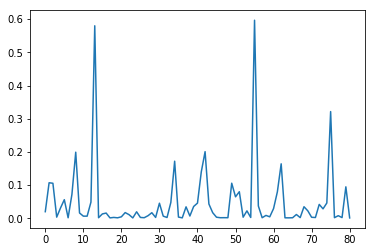

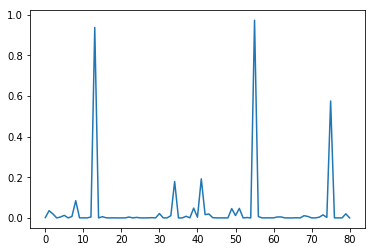

In [19]:
import matplotlib.pyplot as plt
plt.plot(modelNeuronal.predict(X_trainCH)[1][0:81])
plt.show()
plt.plot(modelNeuronal.predict(X_trainCH)[60][0:81])
plt.show()

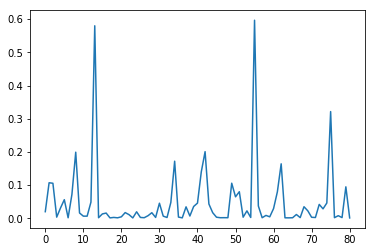

In [20]:
plt.plot(modelNeuronal.predict(X_trainCH)[0:60][1])
plt.show()

Para poder definir una forma de representar las probabilidades como labels de 0 y 1 decidimos que las categorias que sean mayor a 0.5 se tomara como 1 y menor se tomara como 0.

In [21]:
def transformacion(prob_pred, criterio):
    columnas=y_predictCH.shape[0]
    filas=y_predictCH.shape[1]
    sol=np.zeros(shape=(columnas,filas))
    print sol.shape
    for fila in range(filas):
        for columna in range(columnas):
            if (prob_pred[columna][fila] >= criterio ):
                sol[columna][fila] = 1
            else:
                sol[columna][fila] = 0
    return sol

(6700, 81)
(6700, 81)


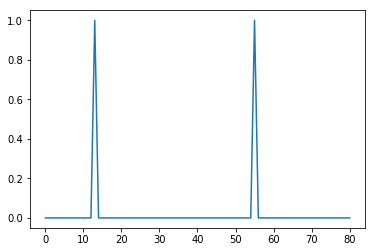

In [22]:
prob_pred = modelNeuronal.predict(X_trainCH)
print prob_pred.shape
criterio = 0.5
y_TrainCH_pred = transformacion(prob_pred,criterio) #define a translate

plt.plot(y_TrainCH_pred[55][0:81])
plt.show()

> k) Ahora que recuperó la representación de las *labels* mida las métricas de desempeño sobre la Red Neuronal. Compare y comente.

In [23]:
print "métrica con datos de entrenamiento: " + str(evaluacion_MinError(y_trainCH,y_TrainCH_pred))

métrica con datos de entrenamiento: 3.47671641791


Se probo diferentes putos de inflexión para tomar el label como 1 y 0 y se llego a la conclusión que 0.5 es el con menor error, pero es muy parecido al entregado anteriormente el cual era 3.2655, por lo cual podriamos decir que no es suficientemente bueno como para utilizar este metodo en este caso.